<a href="https://colab.research.google.com/github/afinoor/predicting-housing-rents-Bangladesh/blob/main/Predicting_house_rents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
from google.colab import drive

# Importing and Cleaning the dataset

importing the dataset from google drive

In [ ]:
#mounting google drive
drive.mount('/content/gdrive')

# Path for my google drive Folder
drive_path = '/content/gdrive/My Drive/'
folder_path = 'data science projects/predicting house rents/'
file_name = "final_data.csv"

df = pd.read_csv(drive_path+folder_path+file_name)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
df.head()

Unnamed: 0  ...       lng
0           0  ...  91.85030
1           1  ...  91.85030
2           2  ...  91.85030
3           3  ...  91.85030
4           4  ...  90.49787

[5 rows x 12 columns]

We already have detailed address in address1, address2, and address3, extracted from the address column, tell us the city, neighborhood, and area name consecutively. Hence, the longitutes' and latitutes' columns will be dropped, that otherwise would have been used to find the detailed addresses of each house postings. Along with these two columns, columns- "unnamed: 0", "link", and "address" will also be dropped.

In [ ]:
#Dropping the mentioned columns
df_cleaned = df.drop(labels = ["Unnamed: 0", "link", "lng", "lat", "address"], axis = 1)
df_cleaned.head()

sqft   rent  bedroom            address1  address2 address3  bathroom
0  1200  12000        2  North Bagbari Road  Baghbari   Sylhet         2
1  1200  12500        2  North Bagbari Road  Baghbari   Sylhet         2
2  1300  12500        3  North Bagbari Road  Baghbari   Sylhet         2
3  1300  13000        3  North Bagbari Road  Baghbari   Sylhet         2
4  1200  12000        3             Matuail     Demra    Dhaka         2

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90234 entries, 0 to 90233
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sqft      90234 non-null  int64 
 1   rent      90234 non-null  int64 
 2   bedroom   90234 non-null  int64 
 3   address1  90234 non-null  object
 4   address2  90234 non-null  object
 5   address3  90234 non-null  object
 6   bathroom  90234 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 4.8+ MB


As it is mandatory to insert these info before posting a house to rent in bproperty, we, fortunately, do not have any missing values.

# Delving into the data

In [ ]:
df_cleaned.describe()

sqft          rent       bedroom      bathroom
count  90234.000000  90234.000000  90234.000000  90234.000000
mean    1022.124399  17265.725636      2.404759      2.193574
std      409.190810   8602.279844      0.655066      0.821385
min        1.000000   3000.000000      1.000000      1.000000
25%      750.000000  11000.000000      2.000000      2.000000
50%      915.000000  15000.000000      2.000000      2.000000
75%     1250.000000  20500.000000      3.000000      3.000000
max    16000.000000  50000.000000      6.000000      8.000000

In [ ]:
#getting the frequencies of address3 column
df_cleaned['address3'].value_counts().to_frame()

address3
Dhaka                77863
Chattogram            6905
Gazipur               2766
Sylhet                2053
Narayanganj City       450
Cumilla                197

Address3 containts the names of the cities. The majority of the rent listings of Bproperty are from Dhaka city. Rest are mainly from Chattogram, Gazipur, and Sylhet. Few are from  Narayanganj city and Cumilla.

In [ ]:
#getting the frequencies of address2 column
df_cleaned['address2'].value_counts().to_frame()

address2
Mirpur              15717
Uttara               9035
Badda                3857
Banasree             3795
Bashundhara R-A      3714
...                   ...
Kallyanpur              1
Daptari Para            1
Lamabazar               1
Madinabagh              1
Jamtala                 1

[145 rows x 1 columns]

Address line 2 or address2 contains the names of large neighborhood inside each city. From the frequencies, it is evident that Mirpur, Uttara, Badda, Banasree, Bashundhara R-A are the top 5 neighborhoods in terms of number of rent listings. The total number of neighborhoods, listed in Bproperty in all the 6 cities combined, is 145.

In [ ]:
#getting the frequencies of address1 column with address2 and address3 mentioned
df_cleaned[['address1', 'address2', 'address3']].value_counts().to_frame()

0
address1                address2   address3        
17 No West Bakalia Ward Bakalia    Chattogram  1978
Section 6               Mirpur     Dhaka       1971
Nikunja 2               Nikunja    Dhaka       1689
Section 10              Mirpur     Dhaka       1665
Section 12              Mirpur     Dhaka       1648
...                                             ...
Ganaktuli Road          Hazaribag  Dhaka          1
Block A                 Banani     Dhaka          1
Rupnagar                Badda      Dhaka          1
Tamabil Road            Mira Bazar Sylhet         1
Mokim Bazar Road        Bangshal   Dhaka          1

[896 rows x 1 columns]

Address1 column contains the name of the area or road number inside a large neighborhood. For example, output above shows that the Section 6 from adress line 1 of Mirpur (Dhaka) which appreared 1971 times in bporperty. This apprearance can be expressed in other words- section 6 of Mirpur, Dhaka has 1971 rent listings. There are total 896 unique area or road as the number of rows in the table above is 896.

In [ ]:
#importing necessary libraries for visualizations
import plotly.express as px
import seaborn as sns

In [ ]:
fig = px.scatter(
    data_frame=df_cleaned[df_cleaned['sqft'] <= 5000], #to remove outliers after 5000 for a better view at the relation
    x="sqft", 
    y="rent", 
    size="bedroom", 
    color="bathroom",
    hover_name="address3",
    size_max=20,
    opacity = 0.6
)
fig.show()


The scatterplot above shows the relationship between number of bathroom, number of bedroom, and sqft of the house or flat with the rent of the house or flat. The chart depicts the number of bedroom as the size of each listing. It is evident from the naked eye that the average size of the bubbles are increasing as we go from bottom to top in the plot. In other words, as the rent increases (from bottom to top) the number of bedrooms (size of the bubbles) increase as well. 

---
Same relationship is also visible for number of bathrooms as well. As we go from Blue-ish color to Yellow-ish color, the number of bathrooms increases according to the bar at the right hand side. As we from bottom to top in any column, the color of bubbles are turning into a hint of orange from plain blue color. 

---
Moreover, there is a strong relationship between rent and sqft is evident from the plot. As the size, measured in sqft, of a listing increases the rent of that listing increases as well, apart from few variations.

In [ ]:
#printing correlations
print(df_cleaned[['rent', 'sqft']].corr())
print(df_cleaned[['rent', 'bathroom']].corr())
print(df_cleaned[['rent', 'bedroom']].corr())

          rent      sqft
rent  1.000000  0.780094
sqft  0.780094  1.000000
              rent  bathroom
rent      1.000000  0.734141
bathroom  0.734141  1.000000
             rent   bedroom
rent     1.000000  0.653667
bedroom  0.653667  1.000000


As the plot showed, rent and sqft has strong correlation of 0.78. Rent and bathroom has correlation of 0.73 and rent-bedroom correlation is 0.65. Though the correlation of number of bedrooms and rent of a listing is lower than other correlations, it is still significant enough to be considered.

In [ ]:
#plotting the rent in boxplots according to cities from address3 column
fig = px.box(df_cleaned, x="address3", y="rent")
fig.show()

According to the boxplots, Dhaka has the highest median rent of 16k among all the 6 cities. It was predictable as is most populous city among all the 6 cities. After Dhaka comes Narayangnj city, Sylhet, Chittagong, and Cumilla with median asking rate of rent hovering from 10k to 13k. Gazipur has the lowest median asking rate of rent with 9k. So it is clear that the average rent varies significantly from city to city. Hence, this factor could also be significant while predicting rent. Apart from the median rent calculated in plot, Dhaka, Gazipur and Chittagong have considerable number of outliers can be seen in the visualization above. 

# Building Machine Learning Model

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(3, 6):  
  df_cleaned.iloc[:,i] = le.fit_transform(df_cleaned.iloc[:,i])

RandomForest will be used. Now, lets separate our dependent and independent variables.

In [ ]:
#dependent variable
y = df_cleaned.iloc[:, 1].values
y

#independent variables
x = df_cleaned.drop(labels = ['rent'], axis = 1).iloc[:,:].values
x

array([[1200,    2,  426,   10,    5,    2],
       [1200,    2,  426,   10,    5,    2],
       [1300,    3,  426,   10,    5,    2],
       ...,
       [ 500,    1,  264,   98,    2,    1],
       [ 700,    2,  722,   93,    2,    1],
       [2000,    4,  700,    9,    2,    4]])

Now lets import the train test split function (?) to split the dataset into two parts: training set and testng set. Our randomforest model will be optimized using the training. Afterwards, the model will be evaluated on a completely new dataset for the model- testing set. Random_state is being used to fix the split while optimizing the model. But after model finalization this will no longer be used so tht we can get true random split. The dataset is bein split into training and test data by 7:3 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#importing random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

The model has been built from the training dataset using Random Forest technique. Now, this model will be applied on the test dataset to predict the rent. X_test includes the independent variables- sqft, address1, address2, address3, number of bathroom and number of bedroom. These variables will be inserted into the model to predict the rent of the testing dataset.

In [ ]:
y_pred = model.predict(X_test)

Now that rent has been predicted, this prediction will be used to evaluate the model's accuracy. For evaluation, the statistical tool- R square will be applied. R-square measures what proportion of the dependent variable's variation is being explained by the model using the given independent variables. 

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8498713017752242

Here, the R-squared score is 0.8498, which translates to 84.98% variation of the dependent variable being predicted or explained by the model that was developed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



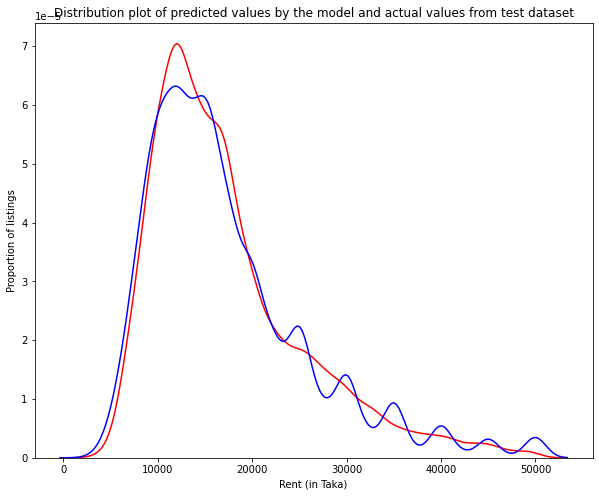

In [ ]:
width = 10
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_pred, hist=False, color="r")
ax2 = sns.distplot(y_test, hist=False, color="b", ax=ax1)

plt.title('Distribution plot of predicted values by the model and actual values from test dataset')
plt.xlabel('Rent (in Taka)')
plt.ylabel('Proportion of listings')

plt.show()
plt.close()

The graph shows that almost all variations were predicted by the model. After rent 20k, the graph followed a downward going staircase pattern that the model could not predict. 